<a href="https://colab.research.google.com/github/rdviii/signal-processing-teaching/blob/main/QAM16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16QAM: Understanding Digital Quadrature Amplitude Modulation
Rodney Van Meter  
25/05/09

I am trying to understand 16QAM encoding for optical networks. QAM is [Quadrature Amplitude Modulation](https://en.wikipedia.org/wiki/Quadrature_amplitude_modulation). Most variants of Ethernet on optical fiber just use on-off keying with NRZ, but a number of the fastest types use PAM-4 ([Pulse Amplitude Modulation](https://en.wikipedia.org/wiki/Pulse-amplitude_modulation)). One type of 400 Gbps Ethernet, 400GBASE-ZR, uses 16QAM, and I presume more and more types will in the future.  (QAM is used extensively in the RF regime, but here I am interested in optical networks only.)

For any digital signal channel, whether baseband or modulated on a carrier, at the receiving end, there are two major challenges: [clock recovery](https://en.wikipedia.org/wiki/Clock_recovery) and [signal attenuation](https://en.wikipedia.org/wiki/Attenuation#Optics). (In this notebook, we won't worry about noise, we're just trying to understand the basic encoding and decoding.)  Worrying about attenuation is particularly important with PAM, as you have to figure how many volts generated at your receiver corresponds to which of the intended signal levels. (This issue is also tied up in the placement of amplifiers in your channel, when necessary.)

But when you go to something like QAM, now there is an additional complication: because the encoding scheme involves several different phases of the carrier, you need to be able to [recover the carrier](https://en.wikipedia.org/wiki/Carrier_recovery), as well.  When using QAM with radio or microwave, an analog electronic circuit is used, I believe. When working in the optical range, however, **I'm not sure if the carrier that needs to be recovered is just the laser or not!** It would need to be recovered in the optical domain, before hitting the detector. Perhaps there is an additional RF-level carrier involved? I'm not sure.



In [6]:
#Importing required library
import numpy as np
import matplotlib.pyplot as plt

First, let's see the two carriers, I and Q.

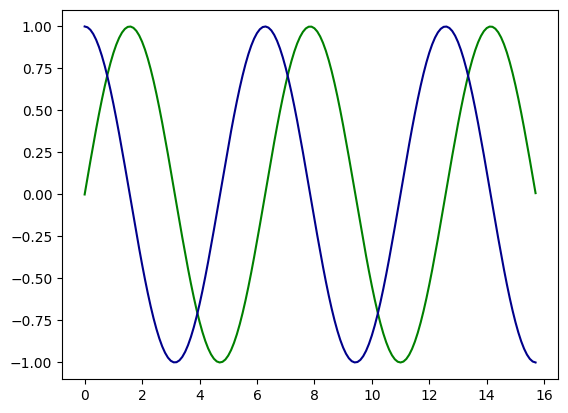

In [7]:
# Creating x axis with range and y axis
# Function for Plotting Sine and Cosine Graph
x = np.arange(0, 5*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# Plotting Sine Graph
plt.plot(x, y1, color='green')
plt.plot(x, y2, color='darkblue')
plt.show()

Two sine waves 90 degrees out of phase can be combined in four if you shift them by either 0 or 180 degrees.  If we set the amplitude of the two carriers to 0.71, then the combined signal will have amplitude 1.0.

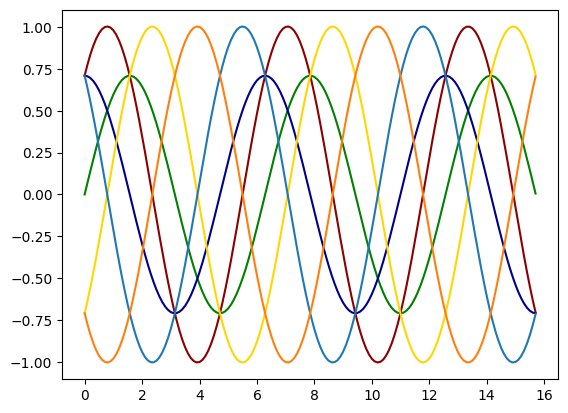

In [10]:
# Creating x axis with range and y axis
# Function for Plotting Sine and Cosine Graph
x = np.arange(0, 5*np.pi, 0.1)
amplitude = 0.71
y1 = amplitude * np.sin(x)
y2 = amplitude * np.cos(x)

# Plotting Sine Graph
plt.plot(x, y1, color='green')
plt.plot(x, y2, color='darkblue')
plt.plot(x, y1+y2, color='darkred')
plt.plot(x, y1-y2, color='gold')
plt.plot(x, -y1+y2)
plt.plot(x, -y1-y2)
plt.show()

Those four different curves can be distinguished successfully with the right kind of analog circuit. That would give us two bits of information. This type of encoding is known as QPSK, or [Quadriphase (or Quadrature) Phase Shift Keying](https://en.wikipedia.org/wiki/Phase-shift_keying#Quadrature_phase-shift_keying_(QPSK)).

But if we also modulate the amplitude of the signal, then we can do a step better, and that leads us to full-on QAM. Using 16QAM, we encode two signals, known as I and Q, each with two possible amplitudes and two possible phases, giving us a total of 16 possible combinations, or four bits of information.
Below are the 16 waves that make up the *constellation* for 16QAM.

The low amplitude is 0.23 and the high amplitude is 0.71, normalizing so that the highest amplitude is 1.0. The four largest amplitudes are in the four corners of the 4x4 set of plots, and correspond to the four high-amplitude colored waves in the cell above.

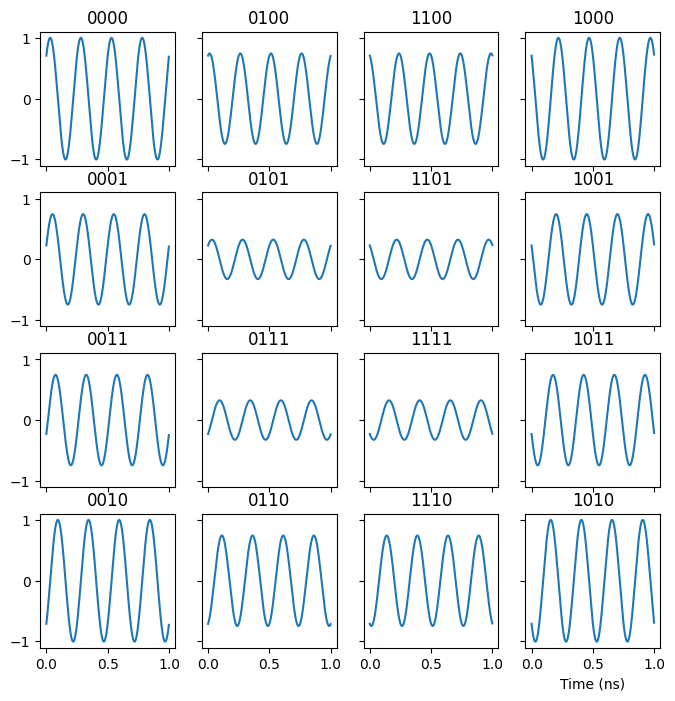

In [9]:

# Define signal parameters
T = 1  # period (seconds)
fs = 1000  # sampling frequency (Hz)
time = np.linspace(0, T, T * fs, endpoint=False)

# Generate sine wave
frequency_sine = 4  # frequency (Hz)
sine_wave = np.sin(2 * np.pi * frequency_sine * time)

# Generate cosine wave
# frequency_sine = 4  # frequency (Hz)
cosine_wave = np.cos(2 * np.pi * frequency_sine * time)

# Set some vars for QAM
iamphi = 0.71
iamplo = 0.23
iphin = 0
iphout = np.pi
qamphi = 0.71
qamplo = 0.23
qphin = 0
qphout = np.pi

# generate the I and Q signals
# high-order bit determines phase (0 for 0, pi for 1)
# low-order bit determines amplitude (lo for 1, hi for 0)
i00 = iamphi * np.sin(2 * np.pi * frequency_sine * time + iphin)
i01 = iamplo * np.sin(2 * np.pi * frequency_sine * time + iphin)
i10 = iamphi * np.sin(2 * np.pi * frequency_sine * time + iphout)
i11 = iamplo * np.sin(2 * np.pi * frequency_sine * time + iphout)
q00 = qamphi * np.cos(2 * np.pi * frequency_sine * time + qphin)
q01 = qamplo * np.cos(2 * np.pi * frequency_sine * time + qphin)
q10 = qamphi * np.cos(2 * np.pi * frequency_sine * time + qphout)
q11 = qamplo * np.cos(2 * np.pi * frequency_sine * time + qphout)

# Plot the waves
# This display order now matches the display order at
# https://en.wikipedia.org/wiki/Quadrature_amplitude_modulation#/media/File:16-QAM_Demonstration_3.gif
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 8))
#axs[0,0].plot(time, sine_wave)
#axs[0,0].set_title('Sine Wave')
#axs[0,1].plot(time, cosine_wave)
#axs[0,1].set_title('Cosine Wave')
axs[0,0].plot(time, i00 + q00)
axs[0,0].set_title('0000')
axs[1,0].plot(time, i00 + q01)
axs[1,0].set_title('0001')
axs[3,0].plot(time, i00 + q10)
axs[3,0].set_title('0010')
axs[2,0].plot(time, i00 + q11)
axs[2,0].set_title('0011')
axs[0,1].plot(time, i01 + q00)
axs[0,1].set_title('0100')
axs[1,1].plot(time, i01 + q01)
axs[1,1].set_title('0101')
axs[3,1].plot(time, i01 + q10)
axs[3,1].set_title('0110')
axs[2,1].plot(time, i01 + q11)
axs[2,1].set_title('0111')
axs[0,3].plot(time, i10 + q00)
axs[0,3].set_title('1000')
axs[1,3].plot(time, i10 + q01)
axs[1,3].set_title('1001')
axs[3,3].plot(time, i10 + q10)
axs[3,3].set_title('1010')
axs[2,3].plot(time, i10 + q11)
axs[2,3].set_title('1011')
axs[0,2].plot(time, i11 + q00)
axs[0,2].set_title('1100')
axs[1,2].plot(time, i11 + q01)
axs[1,2].set_title('1101')
axs[3,2].plot(time, i11 + q10)
axs[3,2].set_title('1110')
axs[2,2].plot(time, i11 + q11)
axs[2,2].set_title('1111')
plt.xlabel('Time (ns)')
plt.show()

Now, the problem is, as I stated at the top of this notebook, I have a very vague idea of how the decoding is done in RF, using an analog oscillator that is synced to the carrier. But I'm really not sure how the equivalent is done in the optical regime. See https://ieeexplore.ieee.org/abstract/document/5464309 for some clues, though I'm not sure yet if that's the standard approach or not. According to that paper, a "local oscillator" (a semiconductor laser diode in its own right, as best I can figure) is included in the receiver. This turns out to be inherently frequency-selective, too, apparently reducing the need for additional wavelength-specific filtering at the receiver.